# Notebook For Showing Image Processing Pipeline

## Import dependencies and plot settings

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from utils import Lane_Finder

save_dir = 'output_images/'
title_size = 15
title_position = 1.04
plot_dpi=150
lane_finder = Lane_Finder()

## Camera Calibration

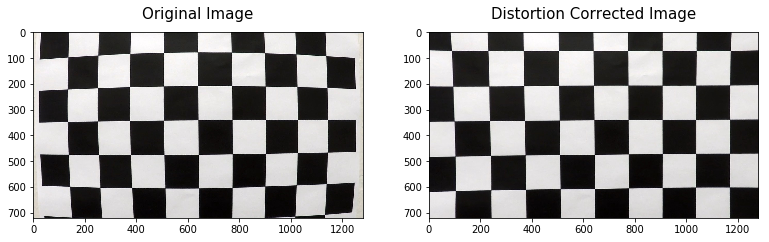

In [2]:
f, axes = plt.subplots(1, 2, figsize=(13, 4))

# Read in the test image
img = plt.imread('camera_cal/calibration1.jpg')

# Undistort the image
undist = cv2.undistort(img, lane_finder.camera_mtx, lane_finder.camera_dist, None, lane_finder.camera_mtx)

# Set titles
axes[0].set_title('Original Image', fontsize=title_size, y=title_position)
axes[1].set_title('Distortion Corrected Image', fontsize=title_size, y=title_position)

# Show images
axes[0].imshow(img)
axes[1].imshow(undist)

# Set figure properties and save result
plt.show()
f.savefig(save_dir+'camera_calibration.png',dpi=plot_dpi, bbox_inches='tight')

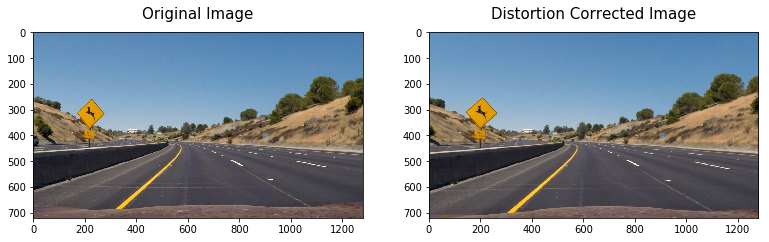

In [3]:
f, axes = plt.subplots(1, 2, figsize=(13, 4))

# Read in the test image
img = plt.imread('test_images/test2.jpg')

# Process the image
undist = cv2.undistort(img, lane_finder.camera_mtx, lane_finder.camera_dist, None, lane_finder.camera_mtx)

# Set titles
axes[0].set_title('Original Image', fontsize=title_size, y=title_position)
axes[1].set_title('Distortion Corrected Image', fontsize=title_size, y=title_position)

# Show images
axes[0].imshow(img)
axes[1].imshow(undist)

# Set figure properties and save result
plt.show()
f.savefig(save_dir+'undistort.png',dpi=plot_dpi, bbox_inches='tight')

## Binary Threshold

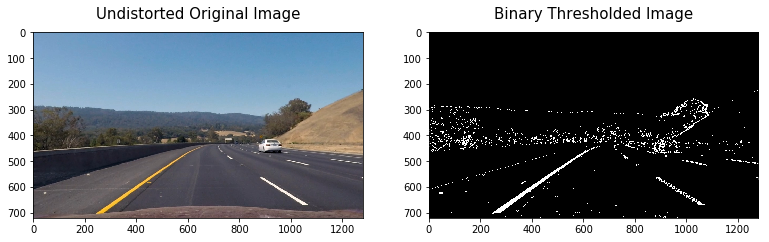

In [4]:
f, axes = plt.subplots(1, 2, figsize=(13, 4))

# Read in the test image
img = plt.imread('test_images/test3.jpg')

# Process the image
undist = cv2.undistort(img, lane_finder.camera_mtx, lane_finder.camera_dist, None, lane_finder.camera_mtx)
binary = lane_finder.threshold_binary(undist)

# Set titles
axes[0].set_title('Undistorted Original Image', fontsize=title_size, y=title_position)
axes[1].set_title('Binary Thresholded Image', fontsize=title_size, y=title_position)

# Show images
axes[0].imshow(undist)
axes[1].imshow(binary, cmap='gray', vmin=0, vmax=1)

# Set figure properties and save result
plt.show()
f.savefig(save_dir+'binary_threshold.png',dpi=plot_dpi, bbox_inches='tight')

## Warp

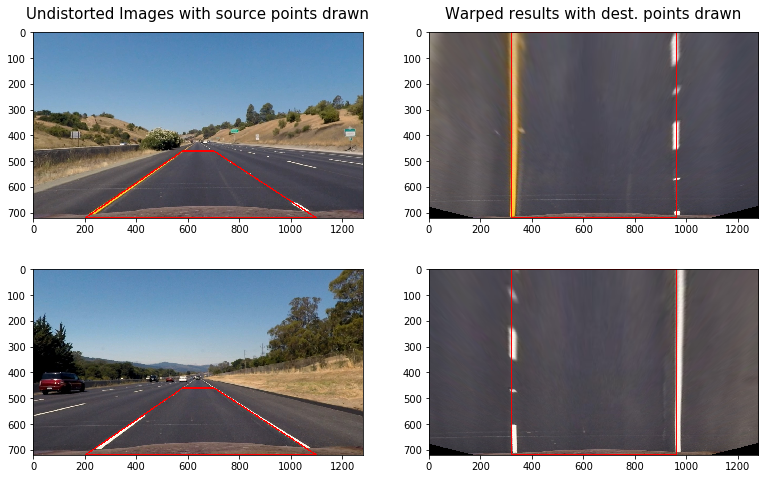

In [5]:
f, axes = plt.subplots(2, 2, figsize=(13, 8))

# Read in the test images
img1 = plt.imread('test_images/straight_lines1.jpg')
img2 = plt.imread('test_images/straight_lines2.jpg')

# Undistort and draw lines on the images
undist1 = cv2.undistort(img1, lane_finder.camera_mtx, lane_finder.camera_dist, None, lane_finder.camera_mtx)
undist2 = cv2.undistort(img2, lane_finder.camera_mtx, lane_finder.camera_dist, None, lane_finder.camera_mtx)
undist1_copy = np.copy(undist1)
undist2_copy = np.copy(undist2)
cv2.polylines(undist1_copy,  lane_finder.src.astype('int32').reshape((1, -1, 1, 2)),  True,  (255, 0, 0),  3)
cv2.polylines(undist2_copy,  lane_finder.src.astype('int32').reshape((1, -1, 1, 2)),  True,  (255, 0, 0),  3)

# Display the undistorted and line-added images
axes[0,0].imshow(undist1_copy)
axes[1,0].imshow(undist2_copy)
axes[0,0].set_title('Undistorted Images with source points drawn', fontsize=title_size, y=title_position)

# Display warped result
warped1 = cv2.warpPerspective(undist1, lane_finder.warp_transform, lane_finder.resolution, flags=cv2.INTER_LINEAR)
warped2 = cv2.warpPerspective(undist2, lane_finder.warp_transform, lane_finder.resolution, flags=cv2.INTER_LINEAR)
cv2.polylines(warped1,  lane_finder.dst.astype('int32').reshape((1, -1, 1, 2)),  True,  (255, 0, 0),  3)
cv2.polylines(warped2,  lane_finder.dst.astype('int32').reshape((1, -1, 1, 2)),  True,  (255, 0, 0),  3)
axes[0,1].set_title('Warped results with dest. points drawn', fontsize=title_size, y=title_position)
axes[0,1].imshow(warped1)
axes[1,1].imshow(warped2)

# Set figure properties and save result
plt.show()
f.savefig(save_dir+'warp.png',dpi=plot_dpi, bbox_inches='tight')

## Lane Search w/ Sliding Window

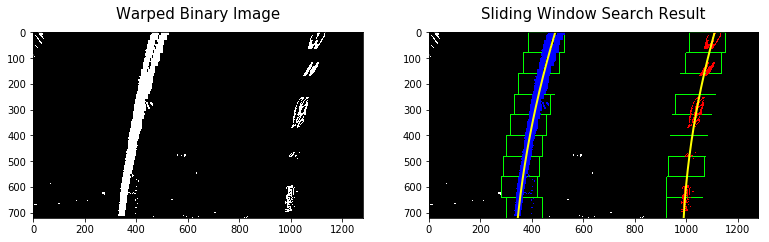

In [3]:
f, axes = plt.subplots(1, 2, figsize=(13, 4))

# Read in the test image
img = plt.imread('test_images/test3.jpg')

# Process the image
undist = cv2.undistort(img, lane_finder.camera_mtx, lane_finder.camera_dist, None, lane_finder.camera_mtx)
binary = lane_finder.threshold_binary(undist)
binary_warped = cv2.warpPerspective(binary, lane_finder.warp_transform, lane_finder.resolution, flags=cv2.INTER_LINEAR)
leftx, lefty, rightx, righty, box_out_img = lane_finder.find_lane_sliding_window(binary_warped)

# fit poly
left_fitx, right_fitx, ploty = lane_finder.fit_poly(leftx, lefty, rightx, righty)
plt.plot(left_fitx, ploty, color='yellow', linewidth=2.0)
plt.plot(right_fitx, ploty, color='yellow', linewidth=2.0)

# Set titles
axes[0].set_title('Warped Binary Image', fontsize=title_size, y=title_position)
axes[1].set_title('Sliding Window Search Result', fontsize=title_size, y=title_position)

# Show images
axes[0].imshow(binary_warped, cmap='gray', vmin=0, vmax=1)
axes[1].imshow(box_out_img)

# Set figure properties and save result
plt.show()
f.savefig(save_dir+'sliding_window.png',dpi=plot_dpi, bbox_inches='tight')

## Lane Search w/ Previous Poly-Fit

## Unwarp & Merge to input

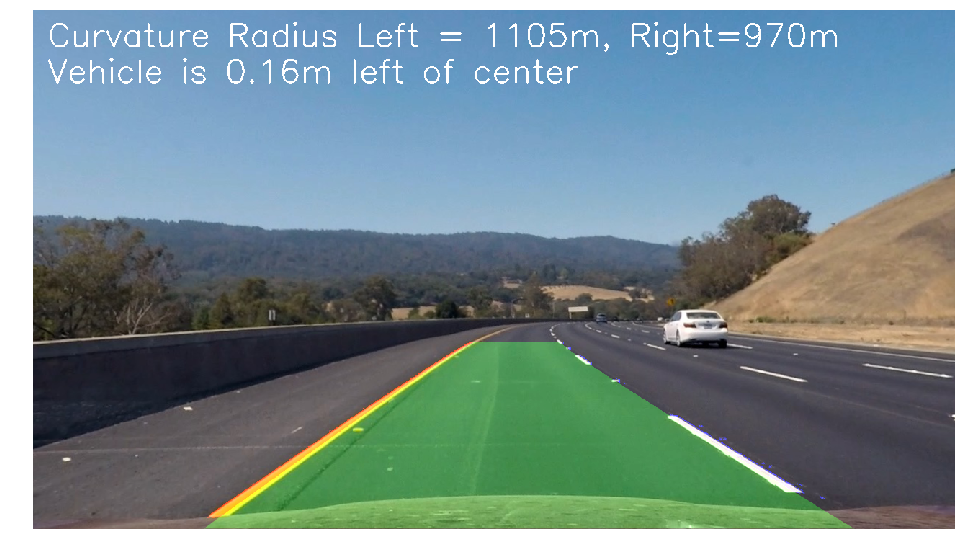

True

In [34]:
f = plt.figure(figsize=(12.8,7.2))
# Read in the test image
img = cv2.imread('test_images/test3.jpg')

# Process the image
processed_img = lane_finder.pipeline(img)

# Show images
plt.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Set figure properties and save result
plt.subplots_adjust(left=0., right=1., top=1., bottom=0.)
plt.show()
cv2.imwrite(save_dir+'pipeline.png',processed_img)